In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.classification import *

In [2]:
%cd ..
%cd data\processed
df = pd.read_csv('2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\processed


In [3]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_order','days_to_donation', 'tot_contribution_paid_amt', 'Lifetime Giving'], axis=1)
df.head()

,owner_no,order_dt,tot_ticket_paid_amt,first_order_dt,first_cont_dt,geo_area_desc,Prelim Capacity,ltv_tkt_value,prospect_board,first_cont_after,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,111,2015-10-07,0.262550,2015-10-07,1900-01-01,1,5,0.104660,0,0,0.067821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,111,2016-09-16,0.280947,2015-10-07,1900-01-01,1,5,0.104660,0,0,0.162745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,111,2018-09-21,0.170287,2015-10-07,1900-01-01,1,5,0.104660,0,0,0.189150,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,258,2014-09-28,0.290096,2014-09-28,1900-01-01,5,6,0.014668,0,0,0.093029,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,262,2014-10-02,0.110229,2014-10-02,1900-01-01,2,4,-0.058711,0,0,0.065087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [4]:
setup(
    df, 
    target = 'first_cont_after',
    train_size = 0.8,
    fix_imbalance = True,
    create_clusters = True,
    numeric_features = ['geo_area_desc','Prelim Capacity']
)

Setup Succesfully Completed!


,Description,Value
0,session_id,7169
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(70372, 37)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  tot_ticket_paid_amt  geo_area_desc  Prelim Capacity  \
 0          111.0             0.262550            1.0              5.0   
 1          111.0             0.280947            1.0              5.0   
 2          111.0             0.170287            1.0              5.0   
 3          258.0             0.290096            5.0              6.0   
 4          262.0             0.110229            2.0              4.0   
 ...          ...                  ...            ...              ...   
 70367  2419011.0            -0.720197            2.0              5.0   
 70368  2419126.0            -0.720197            1.0              0.0   
 70369  2419248.0             0.420163            2.0              4.0   
 70370  2419278.0             0.405498            1.0              3.0   
 70371  2419301.0             0.243553            1.0              0.0   
 
        ltv_tkt_value  rolling_tkt_sum  prospect_board_0  prospect_board_1  \
 0           0.104660         0.

In [5]:
model = compare_models(verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9946,0.9996,0.9929,0.9684,0.9805,0.9774,0.9775,93.6345
1,Extreme Gradient Boosting,0.9936,0.9995,0.9908,0.9630,0.9767,0.9730,0.9731,29.8943
2,Light Gradient Boosting Machine,0.9908,0.9993,0.9897,0.9453,0.9669,0.9616,0.9619,4.3835
3,Extra Trees Classifier,0.9883,0.9992,0.9974,0.9229,0.9587,0.9519,0.9529,11.8276
4,Random Forest Classifier,0.9813,0.9958,0.9814,0.8916,0.9343,0.9234,0.9249,1.0975
5,Decision Tree Classifier,0.9783,0.9537,0.9201,0.9200,0.9200,0.9074,0.9075,2.6605
6,Gradient Boosting Classifier,0.9761,0.9956,0.9965,0.8524,0.9188,0.9049,0.9087,64.5767
7,Ridge Classifier,0.9703,0.0000,0.9906,0.8258,0.9007,0.8834,0.8885,0.4852
8,Linear Discriminant Analysis,0.9703,0.9876,0.9906,0.8259,0.9007,0.8835,0.8885,3.2535
9,Ada Boost Classifier,0.9653,0.9901,0.9312,0.8332,0.8794,0.8593,0.8611,17.8442


In [6]:
%cd ..\..
%cd models

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\models


In [7]:
save_model(model, 'PyCaret on Target 2', verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [8]:
%cd ..\..
%cd ML_Contributions\reports\figures

C:\Users\SiddharthaMisra\Documents\Springboard
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\reports\figures


In [9]:
predict_model(model, verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9962,0.9997,0.9953,0.9774,0.9863,0.9841,0.9841


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,...,data_cluster_11,data_cluster_12,data_cluster_13,data_cluster_14,data_cluster_15,data_cluster_16,data_cluster_17,first_cont_after,Label,Score
0,2390785.0,-0.720197,2.0,4.0,0.190974,0.252692,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0010
1,2415676.0,0.090778,2.0,0.0,-0.156100,-0.089371,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0002
2,2234201.0,-0.720197,1.0,0.0,-0.113966,-0.831507,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0002
3,2389840.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0001
4,2312281.0,0.347602,2.0,2.0,0.073883,0.145654,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,2344907.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0001
14071,2394390.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0001
14072,2399943.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9953
14073,2386919.0,-0.006972,1.0,1.0,-0.047611,-0.178823,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0002


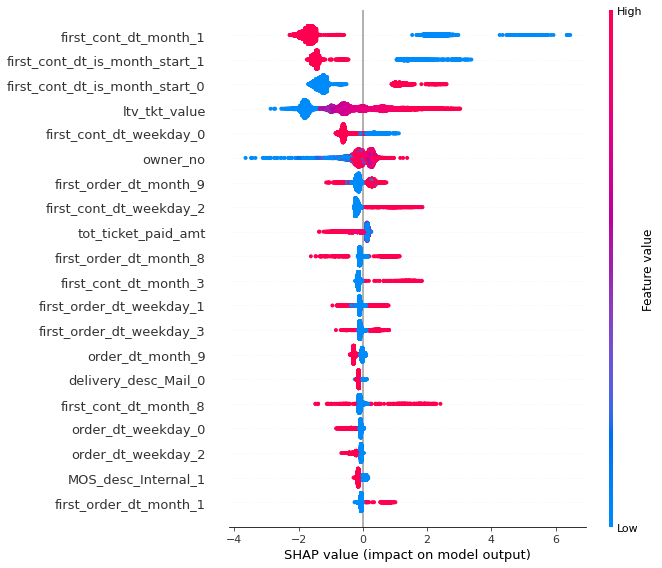

In [11]:
interpret_model(model, plot = 'summary')

In [ ]:
interpret_model(model, plot = 'reason')

In [12]:
#Attempt to create a model that utilizes plot_model() method
model2 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9996,0.9948,0.9524,0.9731,0.9688,0.9691
1,0.9904,0.9994,0.9869,0.9449,0.9654,0.9599,0.9602
2,0.9929,0.9997,0.9856,0.9629,0.9741,0.9700,0.9701
3,0.9922,0.9992,0.9922,0.9523,0.9718,0.9673,0.9676
4,0.9948,0.9996,0.9882,0.9742,0.9812,0.9782,0.9782
5,0.9956,0.9997,0.9908,0.9768,0.9838,0.9812,0.9812
6,0.9940,0.9996,0.9908,0.9656,0.9781,0.9746,0.9747
7,0.9961,0.9997,0.9908,0.9806,0.9857,0.9834,0.9834
8,0.9941,0.9995,0.9935,0.9644,0.9787,0.9753,0.9755
9,0.9931,0.9994,0.9948,0.9560,0.9750,0.9710,0.9712


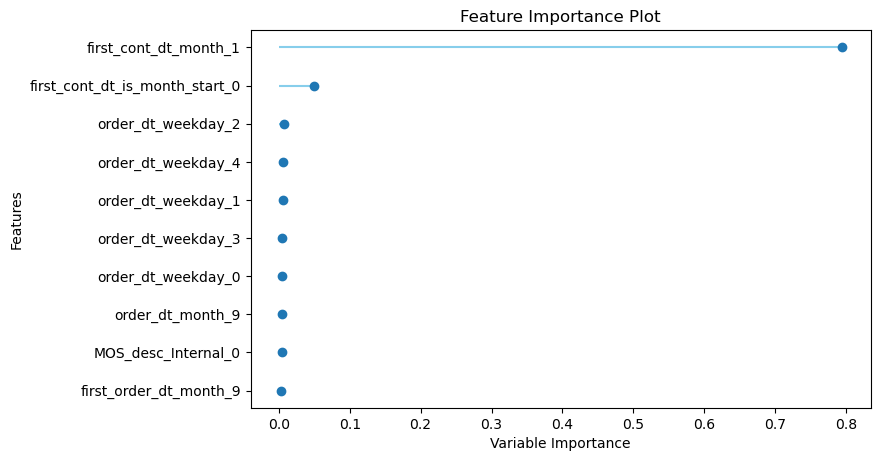

In [13]:
plot_model(model2, 'feature', save=True)

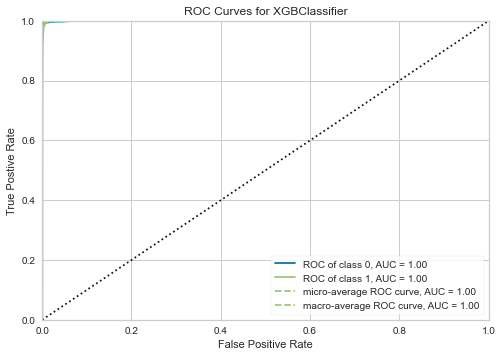

In [14]:
plot_model(model2, 'auc', save=True)

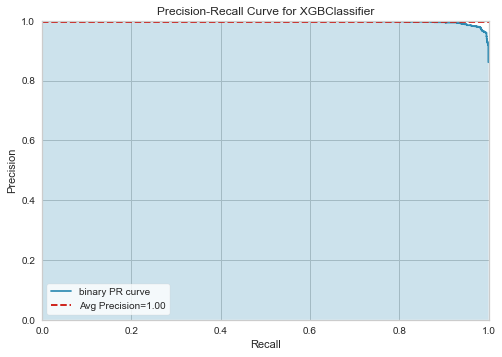

In [15]:
plot_model(model2, 'pr', save=True)

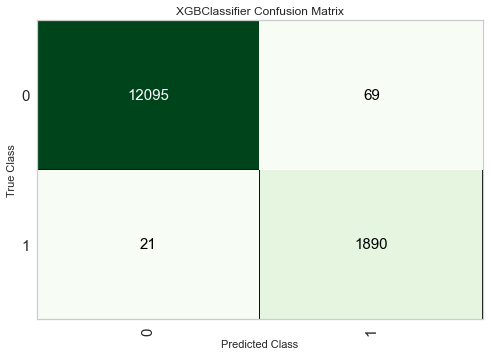

In [16]:
plot_model(model2, 'confusion_matrix', save=True)

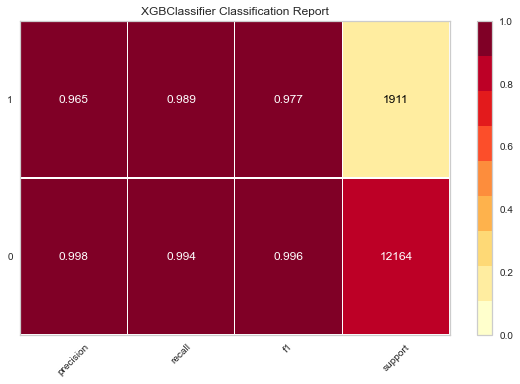

In [17]:
plot_model(model2, 'class_report', save=True)